In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
%matplotlib inline
import os
import re


Using TensorFlow backend.


In [3]:
df = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


Text(0.5, 1.0, 'Sarcasm vs Non-sarcasm')

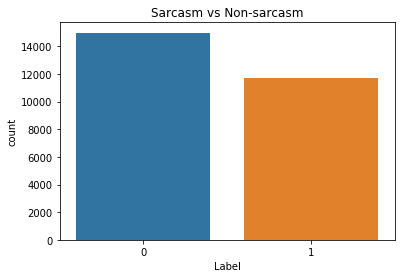

In [4]:
sns.countplot(df.is_sarcastic)
plt.xlabel('Label')
plt.title('Sarcasm vs Non-sarcasm')

In [5]:
df['headline'] = df['headline'].apply(lambda x: x.lower())
df['headline'] = df['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [6]:
for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['headline'].values)
X = tokenizer.texts_to_sequences(df['headline'].values)
X = pad_sequences(X)

In [7]:
Y = pd.get_dummies(df['is_sarcastic']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(17895, 29) (17895, 2)
(8814, 29) (8814, 2)


In [8]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [10]:
batch_size = 32
history = model.fit(X_train, Y_train, epochs = 25, batch_size=batch_size, verbose = 2)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/25
 - 60s - loss: 0.4467 - accuracy: 0.7839
Epoch 2/25
 - 53s - loss: 0.3376 - accuracy: 0.8534
Epoch 3/25
 - 50s - loss: 0.3025 - accuracy: 0.8725
Epoch 4/25
 - 50s - loss: 0.2778 - accuracy: 0.8866
Epoch 5/25
 - 45s - loss: 0.2611 - accuracy: 0.8900
Epoch 6/25
 - 43s - loss: 0.2436 - accuracy: 0.8991
Epoch 7/25
 - 42s - loss: 0.2254 - accuracy: 0.9063
Epoch 8/25
 - 42s - loss: 0.2100 - accuracy: 0.9146
Epoch 9/25
 - 41s - loss: 0.1904 - accuracy: 0.9215
Epoch 10/25
 - 44s - loss: 0.1810 - accuracy: 0.9266
Epoch 11/25
 - 43s - loss: 0.1664 - accuracy: 0.9316
Epoch 12/25
 - 41s - loss: 0.1541 - accuracy: 0.9376
Epoch 13/25
 - 43s - loss: 0.1428 - accuracy: 0.9422
Epoch 14/25
 - 43s - loss: 0.1326 - accuracy: 0.9490
Epoch 15/25
 - 43s - loss: 0.1243 - accuracy: 0.9481
Epoch 16/25
 - 45s - loss: 0.1074 - accuracy: 0.9566
Epoch 17/25
 - 42s - loss: 0.0997 - accuracy: 0.9603
Epoch 18/25
 - 44s - loss: 0.0965 - accuracy: 0.9628
Epoch 19/25
 - 44s - loss: 0.0872 - accuracy: 0.9654
Ep

In [11]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 0.95
acc: 0.82


In [49]:
headline = ['Mirrors can’t talk, lucky for you they can’t laugh either.”']
headline = tokenizer.texts_to_sequences(headline)
headline = pad_sequences(headline, maxlen=29, dtype='int32', value=0)

sentiment = model.predict(headline,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Non-sarcastic")
elif (np.argmax(sentiment) == 1):
    print("Sarcasm")

Sarcasm


In [16]:
# getting features and labels
features = df['headline']
labels = df['is_sarcastic']

In [17]:
# vectorizing the data with maximum of 5000 features
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 5000)
features = list(features)
features = tv.fit_transform(features).toarray()

In [18]:
# getting training and testing data
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = .05, random_state = 0)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [20]:
# model 1:-
# Using linear support vector classifier
lsvc = LinearSVC()
# training the model
lsvc.fit(features_train, labels_train)
# getting the score of train and test data
print(lsvc.score(features_train, labels_train)) # 90.93
print(lsvc.score(features_test, labels_test))   # 83.75
# model 2:-
# Using Gaussuan Naive Bayes
gnb = GaussianNB()
gnb.fit(features_train, labels_train)
print(gnb.score(features_train, labels_train))  # 78.86
print(gnb.score(features_test, labels_test))    # 73.80
# model 3:-
# Logistic Regression
lr = LogisticRegression()
lr.fit(features_train, labels_train)
print(lr.score(features_train, labels_train))   # 88.16
print(lr.score(features_test, labels_test))     # 83.08
# model 4:-
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
rfc.fit(features_train, labels_train)
print(rfc.score(features_train, labels_train))  # 98.82
print(rfc.score(features_test, labels_test))    # 79.71

0.9155795530682221
0.8398203592814372
0.7795294210381114
0.7267964071856288


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8874788160643203
0.8450598802395209
0.9883734678595357
0.7911676646706587
